In [6]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from autoencoder_keras import Autoencoder
import matplotlib.pyplot as plt
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 


In [7]:
# Import data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [8]:
# Prepare input
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [9]:
# Keras implementation
autoencoder = Autoencoder(x_train.shape[1], 32)
autoencoder.train(x_train, x_test, 256, 50)
encoded_imgs = autoencoder.getEncodedImage(x_test)
decoded_imgs = autoencoder.getDecodedImage(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5331 - val_loss: 0.4641
Epoch 2/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4301 - val_loss: 0.4077
Epoch 3/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3960 - val_loss: 0.3881
Epoch 4/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3785 - val_loss: 0.3727
Epoch 5/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3649 - val_loss: 0.3609
Epoch 6/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3543 - val_loss: 0.3513
Epoch 7/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3456 - val_loss: 0.3436
Epoch 8/50
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3385 - val_loss: 0.3371
Epoch 9/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3327 - val_

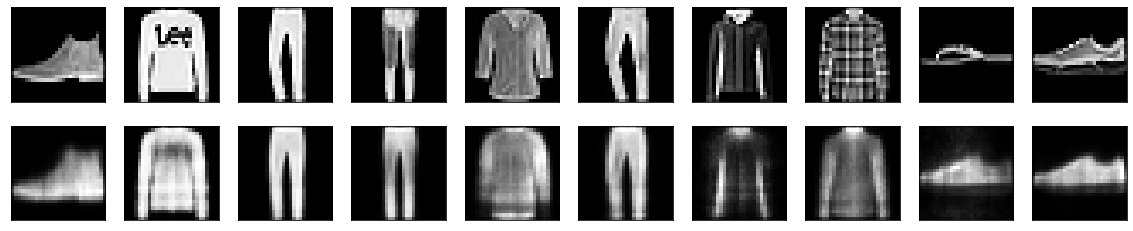

In [5]:
# Keras implementation results
plt.figure(figsize=(20, 4))
for i in range(10):
    # Original
    subplot = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)

    # Reconstruction
    subplot = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
plt.show()